In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [7]:
students_df = pd.read_csv('/Users/mcrandom/Downloads/students.csv')
courses_df = pd.read_csv('/Users/mcrandom/Downloads/courses.csv')
course_student_df = pd.read_csv('/Users/mcrandom/Downloads/studnet_course.csv')
teachers_df = pd.read_csv('/Users/mcrandom/Downloads/teachers.csv')

In [8]:
students_df_copy = students_df.copy()
courses_df_copy = courses_df.copy()
course_student_df_copy = course_student_df.copy()
teachers_df_copy = teachers_df.copy()
##make sure to use the copies

In [9]:
duplicated_email = students_df_copy[students_df_copy.duplicated('email', keep=False)]
duplicated_email
##make sure to use Keep=Fale to make sure the originals are included

,id,first_name,last_name,gender,age,city,education,email
15,16,Sheffie,Fullom,Male,41.0,Haifa,Bachelor's degree,sfullomf@wp.com
26,27,Kaitlynn,Tansley,Female,39.0,Ashkelon,No education,ktansleyq@soup.io
32,33,Wileen,Thirst,NaN,48.0,Ashkelon,High school,wthirstw@youku.com
38,39,Neil,Lipson,Male,27.0,Ashkelon,High school,nlipson12@foxnews.com
65,66,Juieta,Bodycote,Female,37.0,Ashkelon,No education,sfullomf@wp.com
72,73,Jermaine,Gabey,Female,36.0,Jerusalem,Bachelor's degree,ktansleyq@soup.io
88,89,Danny,Haythorne,Male,42.0,Tel Aviv,No education,wthirstw@youku.com
90,91,Opaline,Satterlee,Female,34.0,Tel Aviv,Master's degree,nlipson12@foxnews.com
205,206,Cesar,Lghan,Male,NaN,Tel Aviv,High school,sfullomf@wp.com


In [10]:
student_ids_map = {66: 16, 206: 16, 73: 27, 33: 89, 91: 39} ## {remove: keep} by id | mapping the duplicated
students_df_copy.set_index('id', inplace=True) ## setting the id collum as index to remove dupes by it

In [15]:
students_df_copy.drop(student_ids_map.keys(), axis=0, inplace=True) ## removing the dupes  in student df by id map

In [18]:
students_df_copy.reset_index('id', inplace=True) ##reseting the index

In [20]:
course_student_df_copy['student_id'] = course_student_df_copy['student_id'].replace(student_ids_map)

In [22]:
course_student_df_copy[course_student_df_copy['student_id'] == 16]

,id,student_id,course_id,final_grade
18,19,16,23,83.0
190,191,16,31,83.0
390,391,16,1,66.0
416,417,16,6,60.0
432,433,16,33,52.0
583,584,16,7,75.0
606,607,16,43,87.0
670,671,16,21,75.0
753,754,16,20,61.0
989,990,16,15,70.0


In [24]:
##handle missing data
missing_data = students_df_copy.isnull().sum()
total_rows = students_df_copy.isnull().count()
percentage_missing = missing_data * 100 / total_rows
final_missing_data = pd.concat([total_rows, missing_data, percentage_missing], axis=1, keys=['Total Rows', 'Missing Row', 'Percentage Missing'])
final_missing_data

,Total Rows,Missing Row,Percentage Missing
id,495,0,0.000000
first_name,495,0,0.000000
last_name,495,0,0.000000
gender,495,64,12.929293
age,495,28,5.656566
city,495,0,0.000000
education,495,0,0.000000
email,495,0,0.000000


In [26]:
students_df_copy['gender'] = students_df_copy['gender'].fillna('Unknown')
students_df_copy['age'] = students_df_copy['age'].fillna(round(students_df_copy['age'].mean()))

In [28]:
missing_data = courses_df_copy.isnull().sum()
total_rows = courses_df_copy.isnull().count()
percentage_missing = missing_data * 100 / total_rows
final_missing_data = pd.concat([total_rows, missing_data, percentage_missing], axis=1, keys=['Total Rows', 'Missing Row', 'Percentage Missing'])
final_missing_data

,Total Rows,Missing Row,Percentage Missing
course_id,50,0,0.0
course_name,50,0,0.0
course_category,50,0,0.0
teacher_id,50,5,10.0
course_start_date,50,0,0.0


In [30]:
courses_df_copy.dropna(subset=['teacher_id'], inplace=True)
courses_df_copy

,course_id,course_name,course_category,teacher_id,course_start_date
0,1,Full Stack Developer,Software Development,30.0,2023-08-17
2,3,Product Manager,Product & Business Strategy,14.0,2023-06-28
3,4,AI Developer,Software Development,16.0,2023-11-21
4,5,DevOps Engineer,Software Development,21.0,2023-01-23
5,6,AI Developer,Software Development,7.0,2023-12-08
7,8,AI Developer,Software Development,14.0,2023-03-25
8,9,AI Developer,Software Development,7.0,2023-09-09
9,10,DevOps Engineer,Software Development,10.0,2023-06-17
10,11,Cyber,Data Science & Security,9.0,2023-10-13
11,12,Cyber,Data Science & Security,20.0,2023-11-07


In [32]:
course_student_df_copy = course_student_df_copy[course_student_df_copy['course_id'].isin(courses_df_copy['course_id'])]

In [34]:
missing_data = course_student_df_copy.isnull().sum()
total_rows = course_student_df_copy.isnull().count()
percentage_missing = missing_data * 100 / total_rows
final_missing_data = pd.concat([total_rows, missing_data, percentage_missing], axis=1, keys=['Total Rows', 'Missing Row', 'Percentage Missing'])
final_missing_data

,Total Rows,Missing Row,Percentage Missing
id,895,0,0.000000
student_id,895,0,0.000000
course_id,895,0,0.000000
final_grade,895,56,6.256983


In [35]:
course_student_df_copy.dropna(subset='final_grade',inplace=True)

In [36]:
missing_data = teachers_df_copy.isnull().sum()
total_rows = teachers_df_copy.isnull().count()
percentage_missing = missing_data * 100 / total_rows
final_missing_data = pd.concat([total_rows, missing_data, percentage_missing], axis=1, keys=['Total Rows', 'Missing Row', 'Percentage Missing'])
final_missing_data

,Total Rows,Missing Row,Percentage Missing
id,35,0,0.000000
first_name,35,0,0.000000
last_name,35,0,0.000000
gender,35,3,8.571429
years_of_experience,35,0,0.000000
salary,35,3,8.571429


In [37]:
teachers_df_copy['gender'] = teachers_df_copy['gender'].fillna('Unknown')
teachers_df_copy['salary'] = teachers_df_copy['salary'].fillna(round(teachers_df_copy['salary'].mean()))

1. a. Count the number of students by gender, show a dataframe with each gender type and how many students we have from that type. Plot bar chart to visualize your result.

In [39]:
##data analys
df_gender_count = students_df_copy.groupby('gender').size()
df_gender_count = df_gender_count.reset_index(name= 'count')
df_gender_count

,gender,count
0,Female,212
1,Male,219
2,Unknown,64


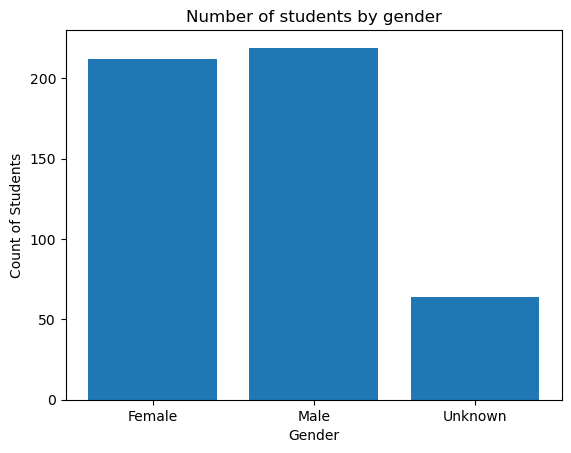

In [40]:
plt.bar(df_gender_count['gender'], df_gender_count['count'])
plt.title('Number of students by gender')
plt.xlabel('Gender')
plt.ylabel('Count of Students')
plt.show()

1. b. Plot the student ages distribution with histogram chart.

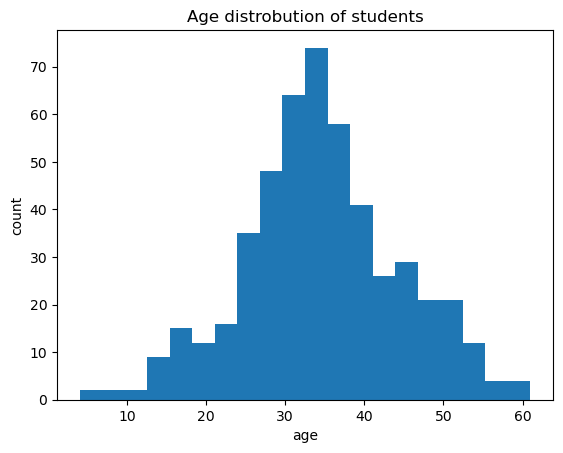

In [48]:
plt.hist(students_df_copy['age'], bins=20)
plt.title('Age distrobution of students')
plt.xlabel('age')
plt.ylabel('count')
plt.show()

1. c. Find what is the city with the highest number of registered students and what is the city with the lowest number of registered students.

In [51]:
city_counts = students_df_copy['city'].value_counts()
city_counts= city_counts.reset_index(name='count')
print(f"the city with highest: {city_counts.iloc[0]['city']} with registred students : {city_counts.iloc[0]['count']}")
print(f"the city with lowest: {city_counts.iloc[-1]['city']} with registred students : {city_counts.iloc[-1]['count']}")

the city with highest: Tel Aviv with registred students : 111
the city with lowest: Ramat Gan with registred students : 11


2. Explore the coursres.csv dataset and answer the following questions, base your answers with data calculations and visualizations if needed:
a. Count the number of courses by category, show a dataframe with each category and how many courses are associated with that category.

In [54]:
courses_by_category_count_df = courses_df_copy.groupby('course_category').size()
courses_by_category_count_df = courses_by_category_count_df.reset_index(name= 'course count')
courses_by_category_count_df

,course_category,course count
0,Data Science & Security,8
1,Product & Business Strategy,7
2,Software Development,30


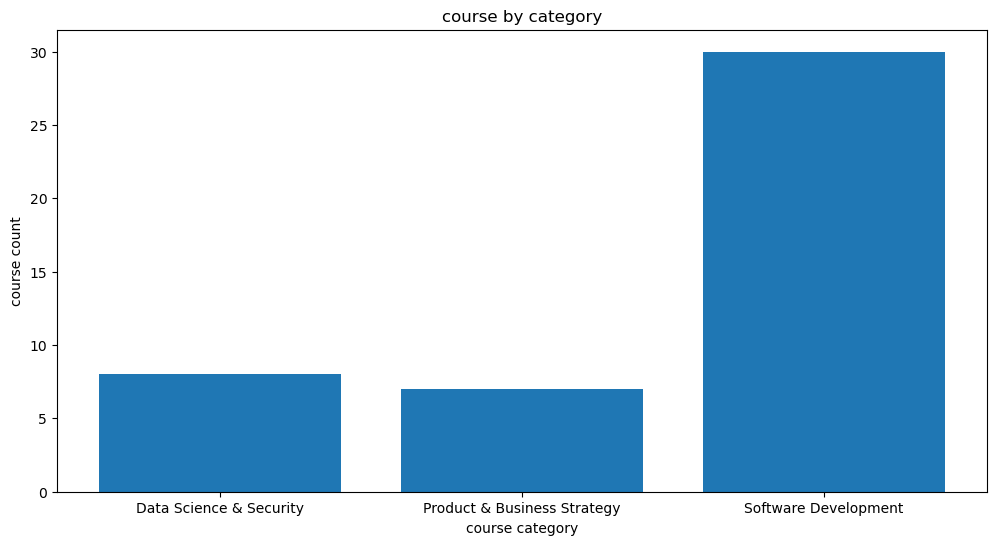

In [56]:
plt.figure(figsize=(12, 6))

# Create a bar chart showing the count of courses by category
plt.bar(courses_by_category_count_df['course_category'], courses_by_category_count_df['course count'])
# Add a title to the plot
plt.title('course by category')
# Label the x-axis
plt.xlabel('course category')
# Label the y-axis
plt.ylabel('course count')
# Display the plot
plt.show()

b. Create a dataframe that shows for each category what are the unique courses names that are associated with that category.

In [59]:
# Group the dataframe by 'course_category' column and get unique course names for each category
# This creates a Series where each index is a course category and the value is an array of unique course names
unique_courses = courses_df_copy.groupby('course_category')['course_name'].unique()
unique_courses = unique_courses.reset_index(name='courses')
unique_courses  # Display the resulting Series of unique course names grouped by category

,course_category,courses
0,Data Science & Security,[Cyber]
1,Product & Business Strategy,[Product Manager]
2,Software Development,"[Full Stack Developer, AI Developer, DevOps En..."


c. Create a dataframe that shows how many different courses have been started in each month during 2023 year.

In [62]:
courses_df_copy['course_start_date'] = pd.to_datetime(courses_df_copy['course_start_date'])
courses_df_copy.set_index('course_start_date', inplace=True)
df_resample = courses_df_copy.resample(rule='M')['course_name'].unique()
df_resample

/var/folders/n_/gjr5vm515r30lns9lx2wd0140000gn/T/ipykernel_11043/1481856684.py:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_resample = courses_df_copy.resample(rule='M')['course_name'].unique()


course_start_date
2023-01-31                   [Product Manager, DevOps Engineer]
2023-02-28               [DevOps Engineer, AI Developer, Cyber]
2023-03-31                                [Cyber, AI Developer]
2023-04-30    [Full Stack Developer, Product Manager, AI Dev...
2023-05-31                                              [Cyber]
2023-06-30     [DevOps Engineer, AI Developer, Product Manager]
2023-07-31                                                   []
2023-08-31                               [Full Stack Developer]
2023-09-30          [AI Developer, Full Stack Developer, Cyber]
2023-10-31    [Cyber, DevOps Engineer, AI Developer, Product...
2023-11-30          [Cyber, AI Developer, Full Stack Developer]
2023-12-31    [AI Developer, Cyber, Product Manager, QA, Ful...
Freq: ME, Name: course_name, dtype: object

In [64]:
# Reset the index of the resampled dataframe, naming the values column as 'list_of_courses'
# This transforms any index (like dates from resampling) into a regular column
# and puts the aggregated course lists into a column named 'list_of_courses'
df_resample = df_resample.reset_index(name='list_of_courses')
df_resample  # Display the resulting dataframe

,course_start_date,list_of_courses
0,2023-01-31,"[Product Manager, DevOps Engineer]"
1,2023-02-28,"[DevOps Engineer, AI Developer, Cyber]"
2,2023-03-31,"[Cyber, AI Developer]"
3,2023-04-30,"[Full Stack Developer, Product Manager, AI Dev..."
4,2023-05-31,[Cyber]
5,2023-06-30,"[DevOps Engineer, AI Developer, Product Manager]"
6,2023-07-31,[]
7,2023-08-31,[Full Stack Developer]
8,2023-09-30,"[AI Developer, Full Stack Developer, Cyber]"
9,2023-10-31,"[Cyber, DevOps Engineer, AI Developer, Product..."


d. Use the dataframe from the previous exercise (2.c) and create a line chart that represent the trend of the number of
opened courses during each month (x-axis should be month date and y-axis should be number of courses in each month)

In [67]:
# Resample the dataframe by month end ('ME') and count unique course names for each month
plot_df_resample = courses_df_copy.resample(rule='ME')['course_name'].nunique()
# Reset the index to convert the DatetimeIndex into a regular column and name the count column 'number of courses'
plot_df_resample = plot_df_resample.reset_index(name='number of courses')
# Display the resulting dataframe showing monthly course counts
plot_df_resample

,course_start_date,number of courses
0,2023-01-31,2
1,2023-02-28,3
2,2023-03-31,2
3,2023-04-30,4
4,2023-05-31,1
5,2023-06-30,3
6,2023-07-31,0
7,2023-08-31,1
8,2023-09-30,3
9,2023-10-31,5


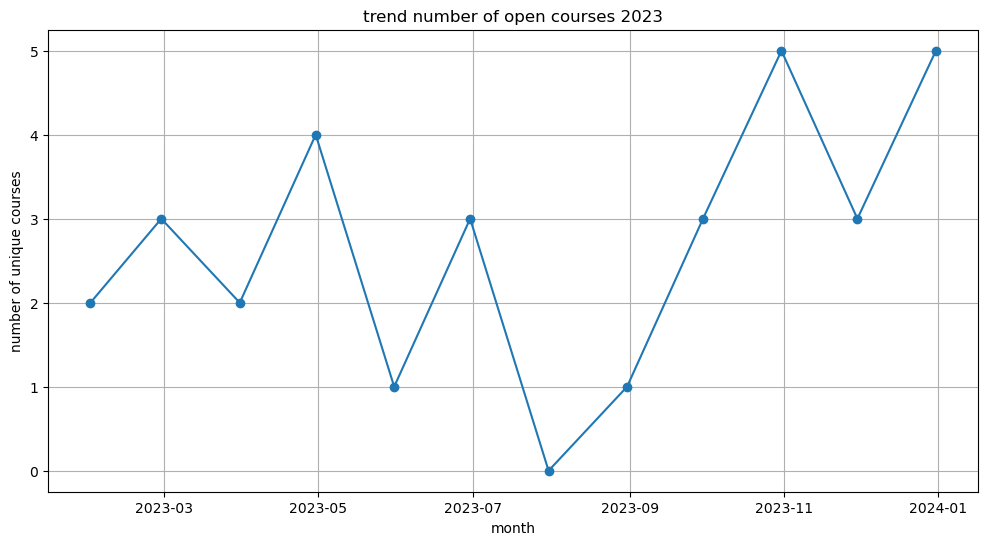

In [69]:
# Create a figure with size 12x6 inches
plt.figure(figsize=(12,6))
# Plot the number of courses over time with circular markers
plt.plot(plot_df_resample['course_start_date'], plot_df_resample['number of courses'], marker='o')
# Add a title to the plot
plt.title('trend number of open courses 2023')
# Label the x-axis
plt.xlabel('month')
# Label the y-axis
plt.ylabel('number of unique courses')
# Add a grid to the plot for better readability
plt.grid()
# Display the plot
plt.show()

4. Use all datasets and answer the following questions:
a. Find the id, name and salary of the teacher that is teaching the most courses during 2023 year. In case there are multiple teachers, include them all in your answer.

In [72]:
# Merge teachers and courses dataframes to associate teachers with their courses
teacher_course_count = teachers_df_copy.merge(courses_df_copy, left_on='id', right_on='teacher_id', how='inner')

# Count how many courses each teacher teaches by grouping by teacher_id
teacher_course_max_count = teacher_course_count.groupby('teacher_id')['course_name'].count()

# Reset the index to convert the Series to a DataFrame with 'teacher_id' as a column
# and rename the count column to 'course_count'
teacher_course_max_count = teacher_course_max_count.reset_index(name='course_count')

# Display the resulting DataFrame showing each teacher's course count
teacher_course_max_count

,teacher_id,course_count
0,1.0,1
1,2.0,1
2,3.0,3
3,4.0,1
4,5.0,3
5,6.0,2
6,7.0,2
7,9.0,3
8,10.0,2
9,11.0,1


In [74]:
teacher_course_max_count = teacher_course_max_count[teacher_course_max_count['course_count'] == teacher_course_max_count['course_count'].max()]
teacher_course_max_count

,teacher_id,course_count
2,3.0,3
4,5.0,3
7,9.0,3
15,20.0,3
16,21.0,3


In [76]:
# Merge the teachers dataframe with the teacher_course_max_count dataframe
# This joins teacher information with their course count data using teacher ID
result_df = teachers_df_copy.merge(teacher_course_max_count, left_on='id', right_on='teacher_id', how='inner')

# Remove unnecessary columns from the merged dataframe
# We drop gender, years_of_experience, and the redundant teacher_id columns
result_df.drop(['gender','years_of_experience', 'teacher_id'], axis=1, inplace=True)

# Display the resulting dataframe
result_df

,id,first_name,last_name,salary,course_count
0,3,Jillayne,Younger,22000.0,3
1,5,Kennett,Bugdale,33900.0,3
2,9,Mona,Hallihan,26722.0,3
3,20,Gabriello,Jancso,16400.0,3
4,21,Desirae,Grishunin,26300.0,3


b. Investigate if there is a linear trend between student education level and student grade in the course. Use a scatter plot to support your answer.

In [79]:
student_grade_df = students_df_copy.merge(course_student_df_copy, left_on='id', right_on='student_id', how='inner')
student_grade_df

,id_x,first_name,last_name,gender,age,city,education,email,id_y,student_id,course_id,final_grade
0,1,Birgit,Mackriell,Female,15.0,Haifa,No education,bmackriell0@china.com.cn,141,1,47,63.0
1,1,Birgit,Mackriell,Female,15.0,Haifa,No education,bmackriell0@china.com.cn,334,1,38,75.0
2,2,Cristionna,Ferrick,Female,32.0,Bnei Brak,High school,cferrick1@loc.gov,190,2,40,74.0
3,2,Cristionna,Ferrick,Female,32.0,Bnei Brak,High school,cferrick1@loc.gov,233,2,21,49.0
4,2,Cristionna,Ferrick,Female,32.0,Bnei Brak,High school,cferrick1@loc.gov,251,2,44,74.0
...,...,...,...,...,...,...,...,...,...,...,...,...
834,499,Delmer,Alpin,Male,35.0,Haifa,High school,dalpindu@cloudflare.com,219,499,24,66.0
835,499,Delmer,Alpin,Male,35.0,Haifa,High school,dalpindu@cloudflare.com,630,499,3,81.0
836,500,Gillan,Terram,Female,34.0,Haifa,Bachelor's degree,gterramdv@friendfeed.com,318,500,6,61.0
837,500,Gillan,Terram,Female,34.0,Haifa,Bachelor's degree,gterramdv@friendfeed.com,613,500,5,66.0


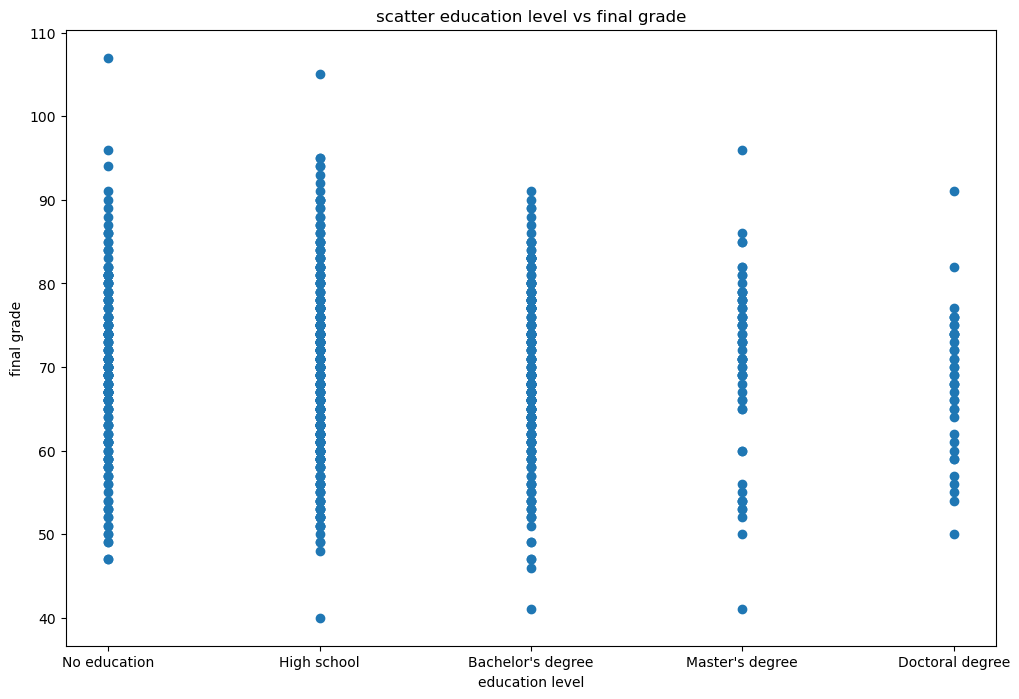

In [81]:
plt.figure(figsize=(12,8))
plt.scatter(student_grade_df['education'], student_grade_df['final_grade'])
plt.title('scatter education level vs final grade')
plt.xlabel('education level')
plt.ylabel('final grade')
plt.show()

c. Find for each course name (during the entire year) what was the mean grade. Plot a bar chart that represent your answer

In [84]:
course_merge = course_student_df_copy.merge(courses_df_copy, on='course_id', how='inner')
mean_grades = course_merge.groupby('course_name')['final_grade'].mean()
mean_grades = mean_grades.reset_index(name='mean grade')
mean_grades

,course_name,mean grade
0,AI Developer,70.062271
1,Cyber,69.520833
2,DevOps Engineer,69.341176
3,Full Stack Developer,69.267016
4,Product Manager,70.161538
5,QA,67.812500


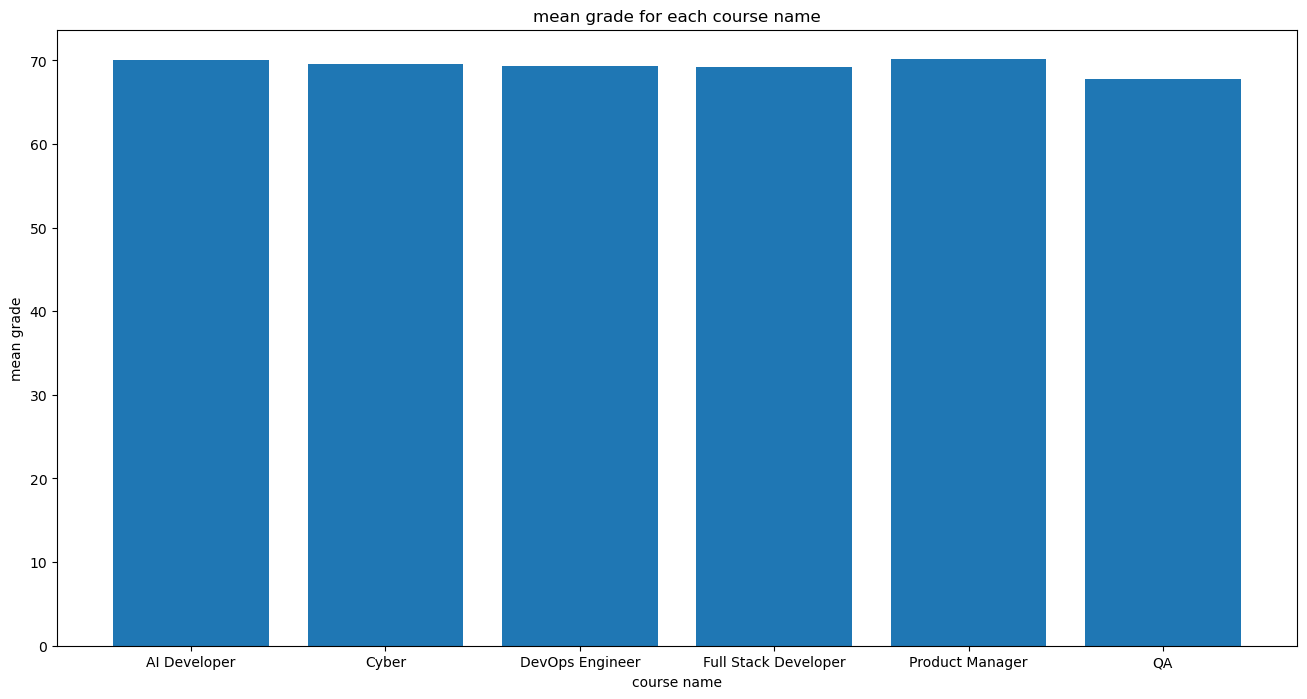

In [86]:
plt.figure(figsize=(16,8))
plt.bar(mean_grades['course_name'], mean_grades['mean grade'])
plt.title('mean grade for each course name')
plt.xlabel('course name')
plt.ylabel('mean grade')
plt.show()

d. Create a new dataframe that shows for each student what is its final_college_grade. final_college_grade is the mean grade that a specific student got in all of his courses together. If a student performs the same course more than once, take in your calculation the higher grade for that course.

In [333]:
# Merge course_student_df_copy with courses_df_copy on course_id to get course details for each student
course_student_merge = course_student_df_copy.merge(courses_df_copy, on='course_id', how='inner')

# Group by student_id and course_name, then find the maximum final_grade for each student in each course
max_grades_df = course_student_merge.groupby(['student_id', 'course_name'])['final_grade'].max()
max_grades_df = max_grades_df.reset_index()
max_grades_df

,student_id,course_name,final_grade
0,1,AI Developer,63.0
1,1,Cyber,75.0
2,2,AI Developer,74.0
3,2,Full Stack Developer,49.0
4,2,Product Manager,66.0
...,...,...,...
688,499,AI Developer,66.0
689,499,Product Manager,81.0
690,500,AI Developer,61.0
691,500,DevOps Engineer,66.0


In [337]:
final_college_grade_df = max_grades_df.groupby('student_id')['final_grade'].mean()
final_college_grade_df = final_college_grade_df.reset_index(name='final college grade')
final_college_grade_df

,student_id,final college grade
0,1,69.000000
1,2,63.000000
2,3,72.000000
3,4,90.000000
4,5,76.500000
...,...,...
402,496,63.000000
403,497,71.000000
404,498,68.500000
405,499,73.500000


In [10]:
course_student_df_copy

,id,student_id,course_id,final_grade
0,1,247,26,81.0
1,2,113,11,NaN
2,3,125,4,63.0
3,4,455,50,72.0
4,5,140,9,59.0
...,...,...,...,...
995,996,48,39,NaN
996,997,269,35,85.0
997,998,75,42,78.0
998,999,21,4,69.0
